In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data: normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=7.5,
    width_shift_range=0.075,
    height_shift_range=0.075,
    zoom_range=0.085
)
datagen.fit(x_train)

# Define the CNN model
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Regularization

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=15,
    validation_data=(x_test, y_test)
)
model.save('fashion_mnist_model.h5')
# Evaluate the model on the test data
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]))

# Display overall model performance
_, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 56ms/step - accuracy: 0.6057 - loss: 1.1548 - val_accuracy: 0.8101 - val_loss: 0.5132
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 50ms/step - accuracy: 0.7710 - loss: 0.6271 - val_accuracy: 0.8334 - val_loss: 0.4374
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.7968 - loss: 0.5619 - val_accuracy: 0.7929 - val_loss: 0.5782
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 145s 50ms/step - accuracy: 0.8110 - loss: 0.5253 - val_accuracy: 0.8438 - val_loss: 0.4202
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 52ms/step - accuracy: 0.8230 - loss: 0.4909 - val_accuracy: 0.8343 - val_loss: 0.4316
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 51ms/step - accuracy: 0.8267 - loss: 0.4839 - val_accuracy: 0.8461 - val_loss: 0.4046
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 52ms/step - accuracy: 0.8379 - loss: 0.4552 - val_accuracy: 0.8384 - val_loss: 0.4183
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 53ms/step - accuracy: 0.8390 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.93      0.65      0.76      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.88      0.62      0.73      1000
       Dress       0.84      0.90      0.87      1000
        Coat       0.73      0.83      0.78      1000
      Sandal       0.90      0.99      0.94      1000
       Shirt       0.54      0.73      0.62      1000
     Sneaker       0.97      0.87      0.92      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8475 - loss: 0.3953
Test Accuracy: 0.8516


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


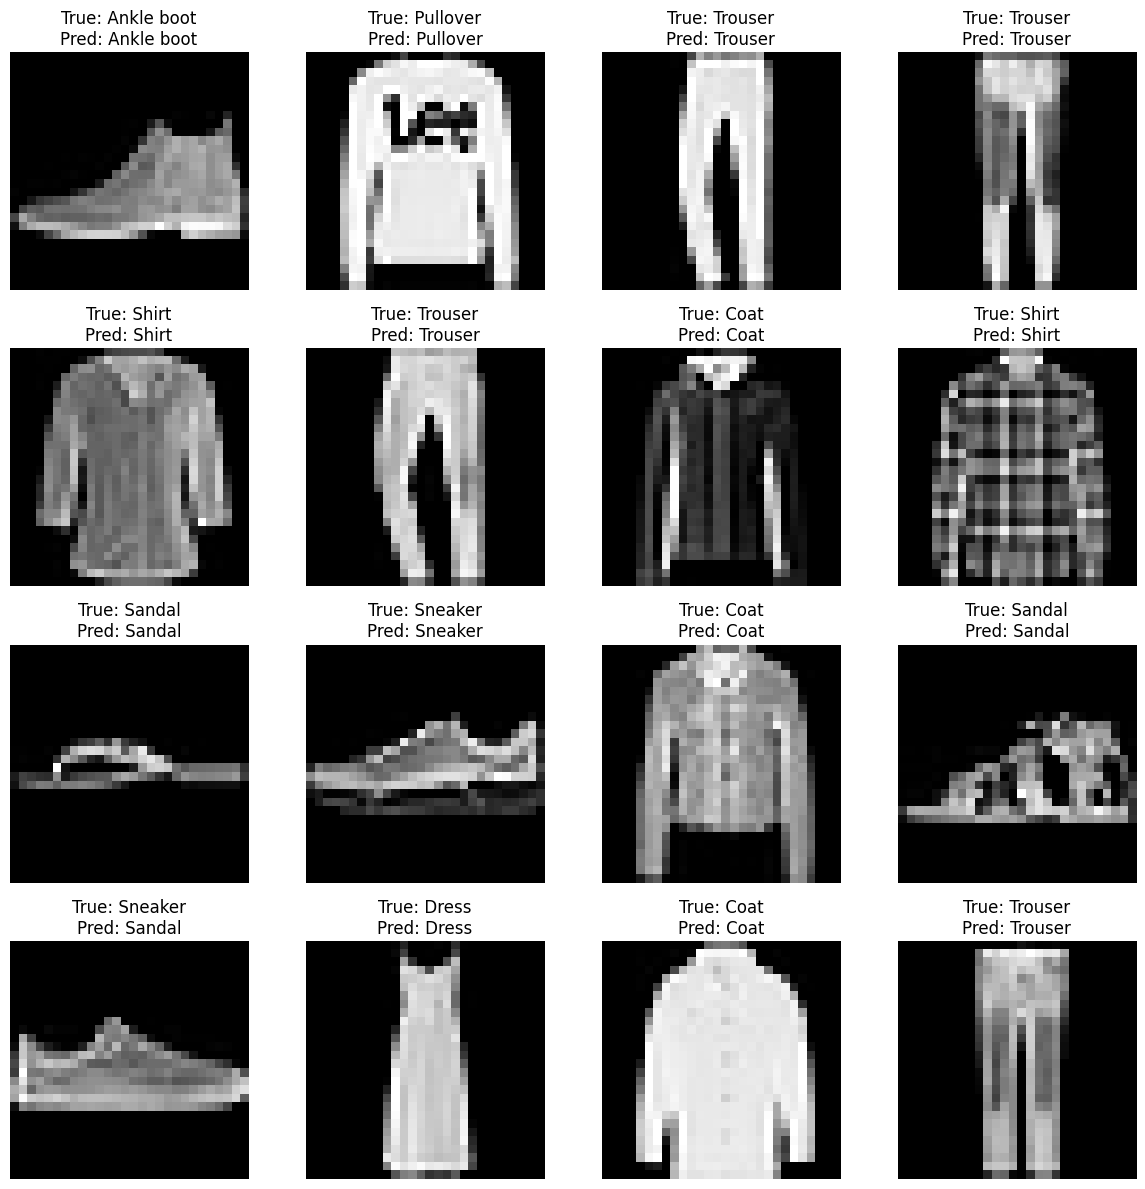

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model

# Load the Fashion-MNIST dataset
(_, _), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the test data
x_test = x_test / 255.0  # Normalize
x_test = x_test[..., np.newaxis]  # Add channel dimension

# Load your trained model (assuming it's saved as 'fashion_mnist_model.h5')
model = load_model('fashion_mnist_model.h5')

# Get model predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Define the class names for Fashion-MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Display sample images with predictions
plt.figure(figsize=(12, 12))
for i in range(16):  # Display 16 sample images
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[y_pred[i]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


REGRESSION COMPONENT

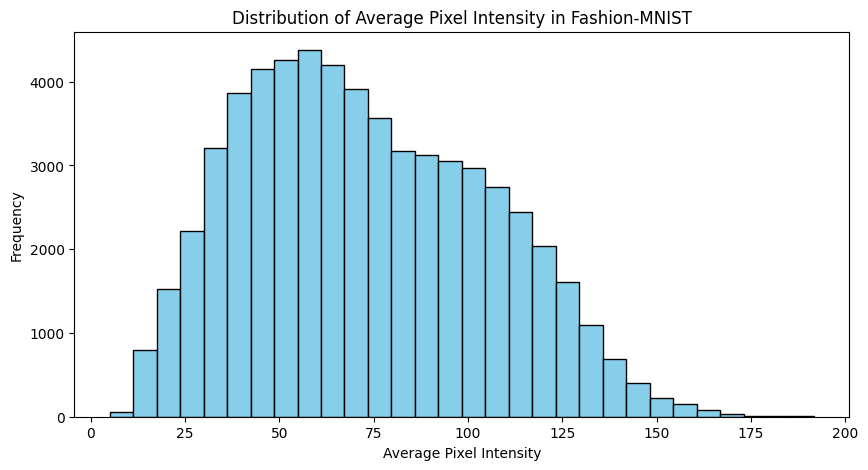

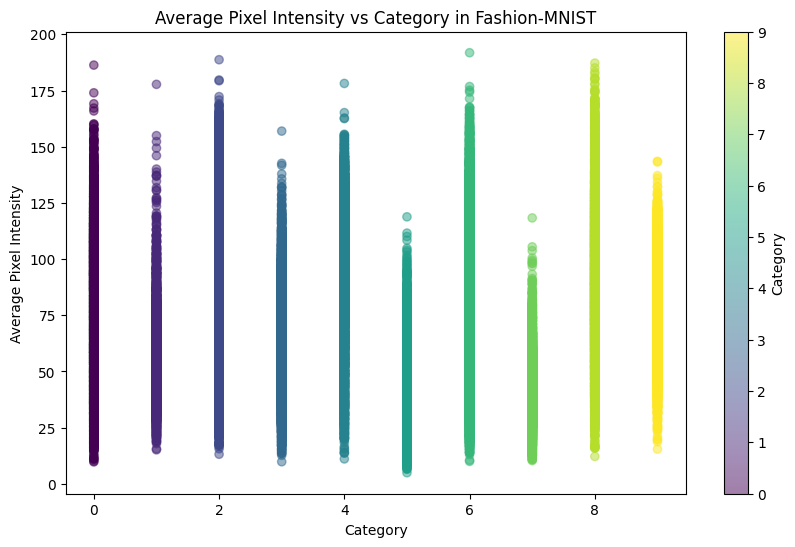

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Calculate average pixel intensity for each image in the training set
avg_intensity_train = np.mean(x_train, axis=(1, 2))

# Plot histogram of average pixel intensity
plt.figure(figsize=(10, 5))
plt.hist(avg_intensity_train, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Pixel Intensity in Fashion-MNIST")
plt.xlabel("Average Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: Average Pixel Intensity vs. Category
plt.figure(figsize=(10, 6))
plt.scatter(y_train, avg_intensity_train, alpha=0.5, c=y_train, cmap="viridis")
plt.colorbar(label="Category")
plt.title("Average Pixel Intensity vs Category in Fashion-MNIST")
plt.xlabel("Category")
plt.ylabel("Average Pixel Intensity")
plt.show()


In [ ]:
import shutil

# Replace 'my_program_files' with the name of your folder or file
shutil.make_archive('my_program_files_zip', 'zip', 'my_program_files')

# This creates 'my_program_files_zip.zip' in the current working directory
from google.colab import files

# Replace 'my_program_files_zip.zip' with the name of your zip file
files.download('my_program_files_zip.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>